In [1]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#sklearn regression algorithims
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost
import pickle5 as pickle
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
import matplotlib.pyplot as plt

In [3]:
def machine_learning(parameters,algorithm, X_train, X_test, y_train, y_test, algo_name="unknown",dataset="first_year"):         
    gscv=GridSearchCV(algorithm,parameters,scoring='neg_mean_squared_error',n_jobs=-1)
    gscv.fit(X_train, y_train)
    print('Best hyperparameter: {}'.format(gscv.best_params_))
    y_hat = gscv.predict(X_test)
    rmse = mean_squared_error(y_hat,y_test,squared=False)
    print("{} : The root mean squared error is {}".format(algo_name,rmse))
    return y_hat 

In [4]:
def preds_vs_actuals_plot(predicted_value,true_value,algo_name):
    plt.scatter(predicted_value,true_value , c='crimson')
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actuals', fontsize=15)
    plt.title('{} Preds vs Actuals'.format(algo_name))
    plt.axis('equal')
    plt.show()

In [5]:
four_years_df = pd.read_pickle("cleaned_df.pkl")
four_years_df = four_years_df[four_years_df['MP']>250]
four_years_df = four_years_df.drop(['POS','Name','YEAR','Season','through_4_years','WITH SHOES','MP'],axis=1)
four_years_df = pd.get_dummies(four_years_df)

Text(0.5, 1.0, 'First Year BPM Histogram')

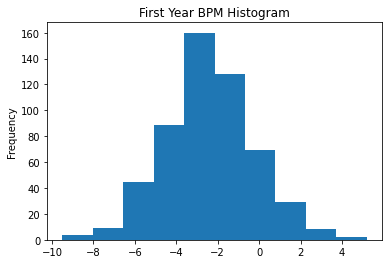

In [7]:
four_years_df['BPM'].plot.hist()
plt.title('First Year BPM Histogram')

Text(0.5, 1.0, 'Four-year-AVG BPM Histogram')

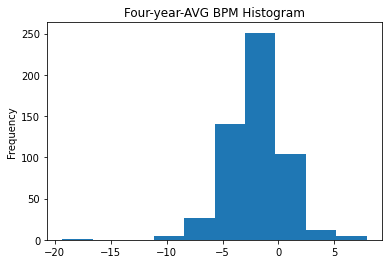

In [8]:
four_years_df['Avg_BPM'].plot.hist()
plt.title('Four-year-AVG BPM Histogram')

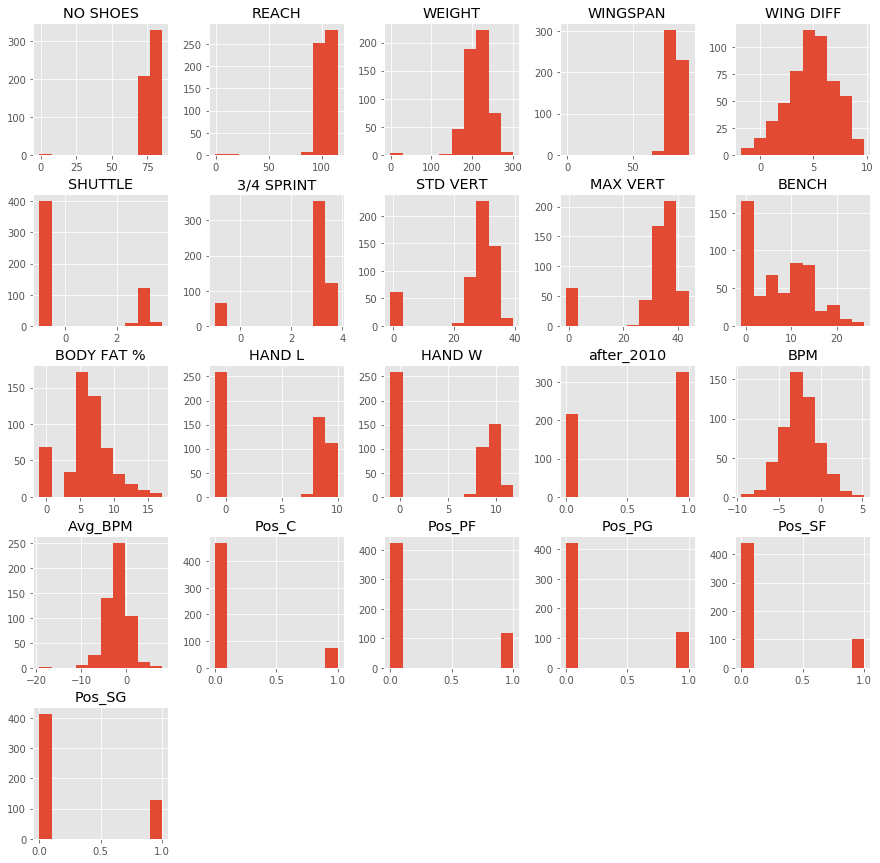

In [43]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(four_years_df, figsize = [15,15]);

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
standard_transformer = Pipeline(steps=[
        ('standard', StandardScaler())])
preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('std', standard_transformer , ['NO SHOES', 'REACH', 'WEIGHT', 'WINGSPAN', 'WING DIFF', 'SHUTTLE',
       '3/4 SPRINT', 'STD VERT', 'MAX VERT', 'BENCH', 'BODY FAT %', 'HAND L',
       'HAND W'])
        ])


In [11]:
def evaluate(target="BPM"):
    X_train, X_test, y_train, y_test = train_test_split(four_years_df.drop(['BPM','Avg_BPM'],axis=1), four_years_df[target], test_size = .2, random_state = 1)
    assert X_test.shape[0] == y_test.shape[0], "wrong shapes for test set"
    assert X_train.shape[0] == y_train.shape[0], "wrong shapes for training set" 
    #X_train = preprocessor.fit_transform(X_train)
    #X_test = preprocessor.fit_transform(X_test)

    param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
    tree = DecisionTreeRegressor()
    y_hat = machine_learning(param_grid,tree,X_train, X_test, y_train, y_test, algo_name="decision tree",dataset=target)
    preds_vs_actuals_plot(y_hat,y_test,"decision tree")
    print("Done with tree")


    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
        } 
    rf = RandomForestRegressor()
    y_hat=machine_learning(param_grid,rf,X_train, X_test, y_train, y_test, algo_name="RF Regressor",dataset=target)
    preds_vs_actuals_plot(y_hat,y_test,"RF Regressor")
    print("Done with random forest")


    param_grid = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

    xg_boost = xgboost.XGBRegressor(seed=20)
    y_hat=machine_learning(param_grid,xg_boost,X_train, X_test, y_train, y_test, algo_name="XG Boost",dataset=target)
    preds_vs_actuals_plot(y_hat,y_test,"XG Boost")
    print("Done with xgboost")


    param_grid = {'C': [0.1, 1, 10, 100, 1000],
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                 'kernel': ['linear','poly', 'rbf', 'sigmoid']}
    svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')
    y_hat=machine_learning(param_grid,svr_rbf,X_train, X_test, y_train, y_test, algo_name="Support Vector Regressor",dataset=target)
    preds_vs_actuals_plot(y_hat,y_test,"Support Vector Regressor")


    leaf_size = list(range(20,50,5))
    n_neighbors = list(range(5,30,5))
    p=[1,2]
    #Convert to dictionary
    param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    knn_regressor =  KNeighborsRegressor()
    y_hat=machine_learning(knn_regressor,X_train, X_test, y_train, y_test, algo_name="Knn Regressor",dataset=target)
    preds_vs_actuals_plot(y_hat,y_test,"Knn Regressor")




decision tree : The root mean squared error is 2.99561027247225


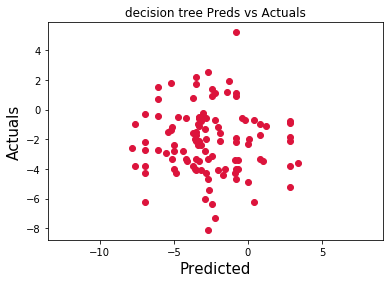

Done with tree
RF Regressor : The root mean squared error is 2.1772088481912646


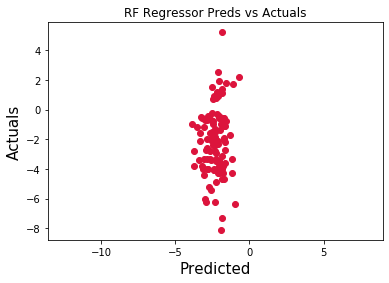

Done with random forest
XG Boost : The root mean squared error is 2.4761980128386436


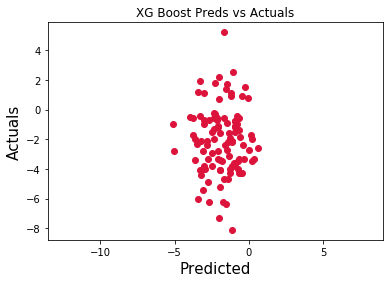

Done with xgboost
Support Vector Regressor : The root mean squared error is 2.136797625398617


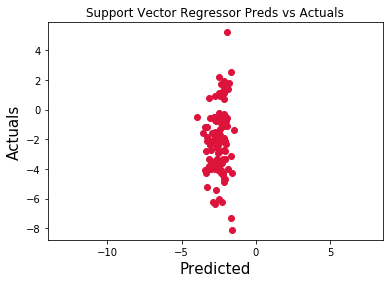

Knn Regressor : The root mean squared error is 2.330295470936592


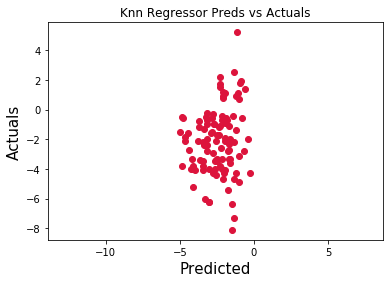

In [33]:
#evaluate()

decision tree : The root mean squared error is 3.9876804704748614


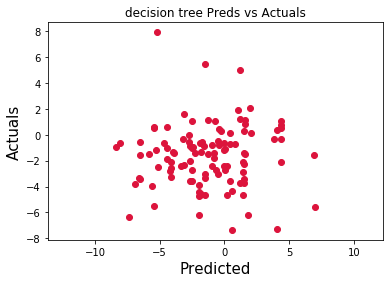

Done with tree
RF Regressor : The root mean squared error is 2.71718486118149


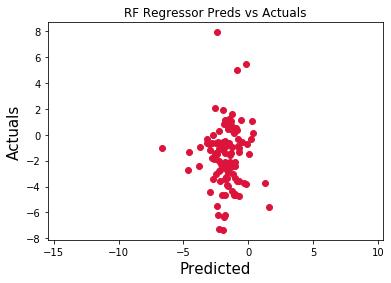

Done with random forest
XG Boost : The root mean squared error is 2.9387318539394016


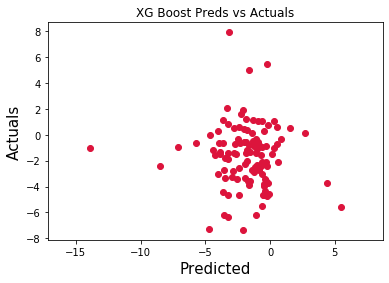

Done with xgboost
Support Vector Regressor : The root mean squared error is 2.616652988211291


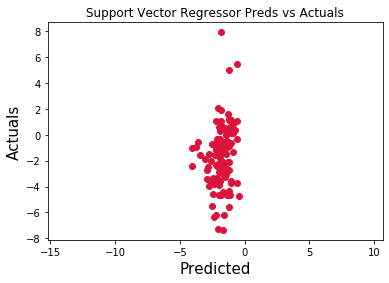

Knn Regressor : The root mean squared error is 2.844474925383441


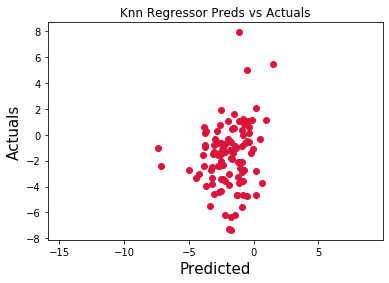

In [34]:
evaluate("Avg_BPM")

Best hyperparameter: {'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 100, 'min_samples_split': 10}
decision tree : The root mean squared error is 2.2755738822051255


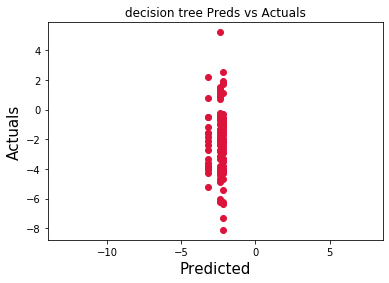

Done with tree
Best hyperparameter: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}
RF Regressor : The root mean squared error is 2.2353893144125374


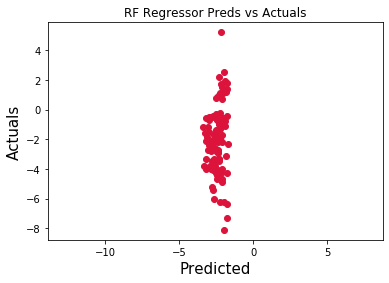

Done with random forest
Best hyperparameter: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
XG Boost : The root mean squared error is 2.258079533511746


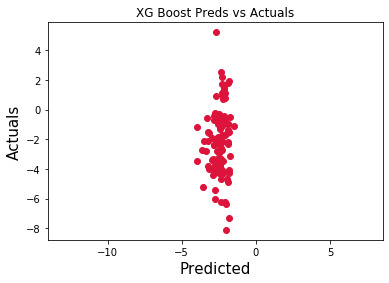

Done with xgboost


In [ ]:
#cross validated tuned models
evaluate('BPM')